In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:>

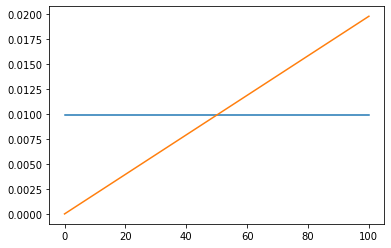

In [2]:
hypos = np.arange(101)  # 101 bowl
prob = pd.DataFrame(index=hypos)

# constant uniform chance of picking one of bowls which with only vanlina for chocolate
prob['initial prior'] = 1 / 101
prob['prior'] = prob['initial prior'].copy()

# P[xi = vanlina | xi] -> First evidence
prob['likelihood'] = hypos / 100
prob['unnorm'] = prob.prior * prob.likelihood
prob['posterior'] = prob.unnorm / prob.unnorm.sum()

prob['initial prior'].plot()
prob.posterior.plot()

<AxesSubplot:>

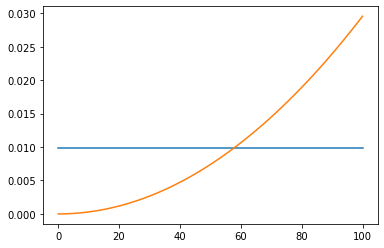

In [3]:
# Second evidence -> vanlina again
prob['prior'] = prob.posterior
prob['likelihood'] = hypos / 100
prob['unnorm'] = prob.prior * prob.likelihood
prob['posterior'] = prob.unnorm / prob.unnorm.sum()

prob['initial prior'].plot()
prob.posterior.plot()

<AxesSubplot:>

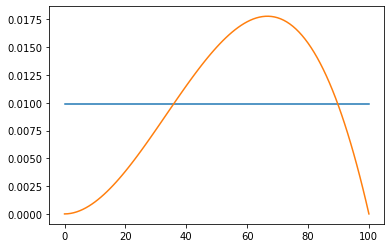

In [4]:
# 3rd evidence -> chocolate
prob['prior'] = prob.posterior
prob['likelihood'] = 1 - (hypos / 100)
prob['unnorm'] = prob.prior * prob.likelihood
prob['posterior'] = prob.unnorm / prob.unnorm.sum()

prob['initial prior'].plot()
prob.posterior.plot() 

C:\Users\ztang\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


,initial prior,prior,likelihood,unnorm,posterior
6-sided,0.333333,0.333333,0.000000,0.000000,0.000000
8-sided,0.333333,0.333333,0.000244,0.000081,0.835052
12-sided,0.333333,0.333333,0.000048,0.000016,0.164948


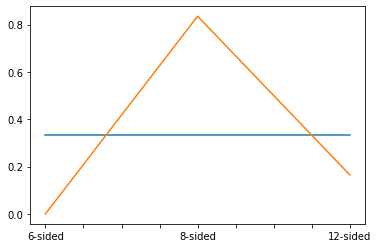

In [5]:
# 6-sided, 8-sided, 12-sided -> P[X=8-sided | 1,3,5,7]
hypos = ['6-sided', '8-sided', '12-sided']
prob = pd.DataFrame(index=hypos)

prob['initial prior'] = 1 / 3
prob['prior'] = prob['initial prior'].copy()

prob['likelihood'] = [0, 1/(8**4), 1/(12**4)]
prob['unnorm'] = prob.prior * prob.likelihood
prob['posterior'] = prob.unnorm / prob.unnorm.sum()

prob['initial prior'].plot()
prob.posterior.plot()
prob

C:\Users\ztang\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


,initial prior,prior,likelihood,unnorm,posterior
4-sided,0.066667,0.066667,0.000000,0.000000,0.000000
6-sided,0.133333,0.133333,0.000000,0.000000,0.000000
8-sided,0.200000,0.200000,0.125000,0.025000,0.391304
12-sided,0.266667,0.266667,0.083333,0.022222,0.347826
20-sided,0.333333,0.333333,0.050000,0.016667,0.260870


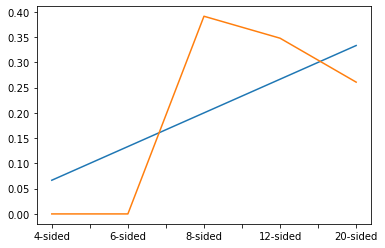

In [6]:
# 1x4-sided, 2x6-sided, 3x8-sided, 4x12-sided, 5x20-sided -> P[X=8-sided | 7]
hypos = ['4-sided', '6-sided', '8-sided', '12-sided', '20-sided']
prob = pd.DataFrame(index=hypos)

prob['initial prior'] = 1/15, 2/15, 3/15, 4/15, 5/15
prob['prior'] = prob['initial prior'].copy()

prob['likelihood'] = 0, 0, 1/8, 1/12, 1/20
prob['unnorm'] = prob.prior * prob.likelihood
prob['posterior'] = prob.unnorm / prob.unnorm.sum()

prob['initial prior'].plot()
prob.posterior.plot()
prob